In [2]:
import numpy as np
import qctoolkit as qtk

/home/samio/local/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


missing file: mov2asc
please modify /path/to/qctoolkit/setting.py and recompile.


# H2O2

In [3]:
mol = qtk.Molecule('h2o2.xyz')
mol.alignAtoms(0,1,2)

In [5]:
mols = []
for a in range(0, 360, 20):
    mol_a = mol.copy()
    mol_a.twist([1,3], [0,1], a)
    mols.append(mol_a)

# C2H6

In [16]:
mol = qtk.Molecule('c2h6.xyz')
mol.alignAtoms(0,1,2)

In [17]:
mols = []
for a in range(0, 360, 20):
    mol_a = mol.copy()
    mol_a.twist([1,2], [0,1], a)
    mols.append(mol_a)

# Test results

In [18]:
for i, m in enumerate(mols):
    m.write('tmp_%02d.xyz' % i)

In [ ]:
inps = []
for m in mols:
    inp = qtk.QMInp(m, program='horton')
    inps.append(inp)

In [ ]:
for inp in inps:
    inp.run()

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

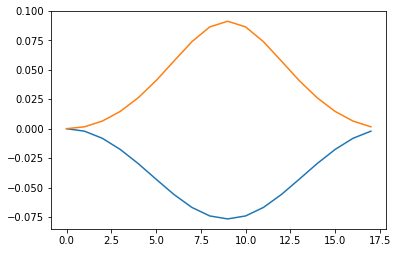

In [10]:
E_ele = np.array([inp.Et - inp.nuclear_repulsion() for inp in inps])
E_nn = np.array([inp.nuclear_repulsion() for inp in inps])
plt.plot(E_ele - E_ele[0])
plt.plot(E_nn - E_nn[0])

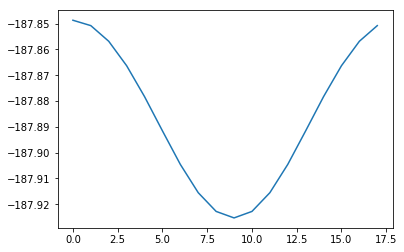

In [11]:
plt.plot([inp.Et - inp.nuclear_repulsion() for inp in inps])